2023-05-30 07:55:05.712719: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of GPUs available : 0
|                                                         TX_ANT_CORRELATION: 0.1 & RX_ANT_CORRELATION: 0.1                                                         |
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|       -15.0|  6.848e-01|  4.537e-01|           59465|     5.469e-01|     3.671e-01|              48121|   5.532e-01|   3.709e-01|          

(array([-15., -10.,  -5.,   0.,   5.]),
 array([[0.68478394, 0.62807465, 0.53094482, 0.36959839, 0.19932556],
        [0.72882843, 0.70864868, 0.67498016, 0.61232758, 0.49921417],
        [0.72773743, 0.70664978, 0.67547607, 0.61236572, 0.50171661],
        [0.74278259, 0.73400879, 0.72510529, 0.70401764, 0.66631317]]),
 array([[0.54685974, 0.41604614, 0.26293945, 0.12537384, 0.04594421],
        [0.59246063, 0.52321625, 0.4334259 , 0.32120514, 0.19973755],
        [0.59297943, 0.52317047, 0.43554688, 0.32590485, 0.19891357],
        [0.61211395, 0.56322479, 0.51050568, 0.44541931, 0.3600769 ]]),
 array([[0.55319214, 0.42103577, 0.2408371 , 0.06952667, 0.00832367],
        [0.61038208, 0.54219055, 0.43951416, 0.30375671, 0.15123749],
        [0.61569214, 0.54582977, 0.45075226, 0.31117249, 0.15475464],
        [0.63845062, 0.59310913, 0.53829956, 0.45793152, 0.36438751]]))

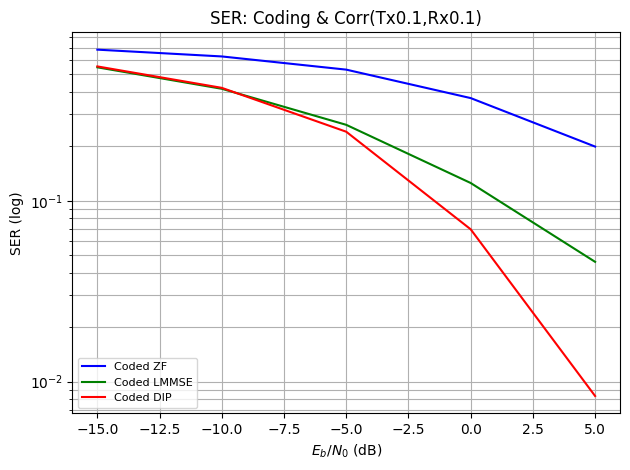

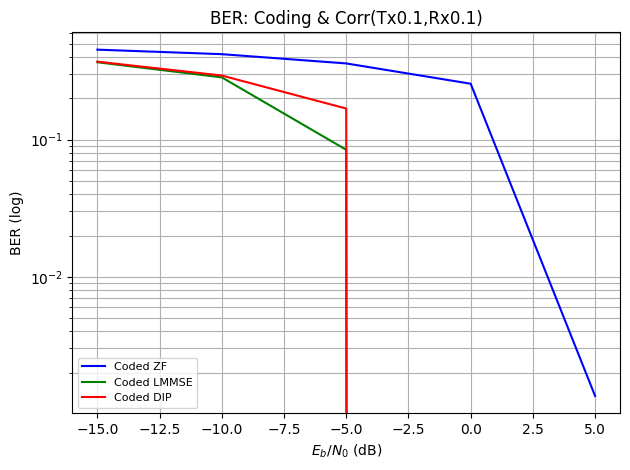

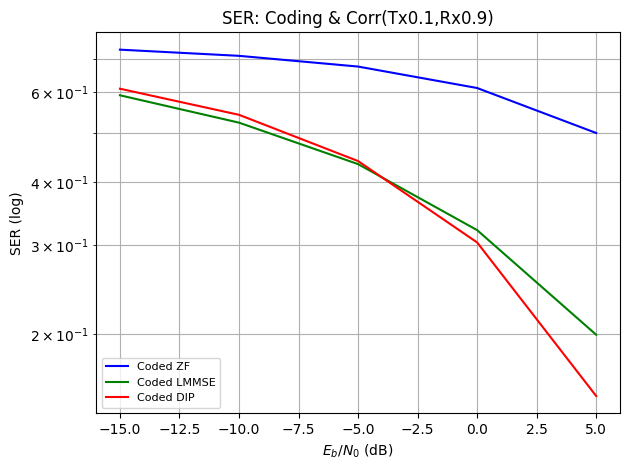

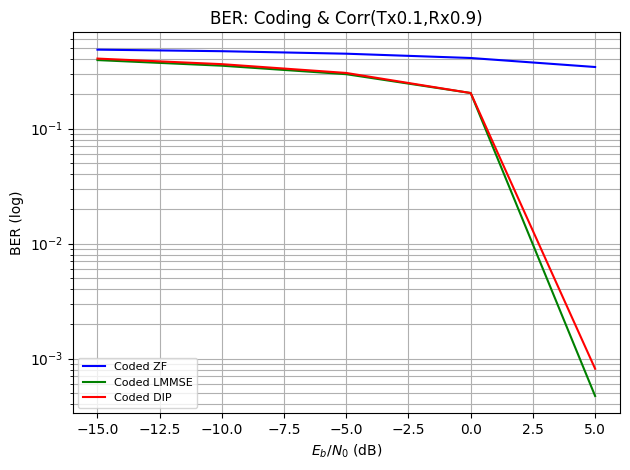

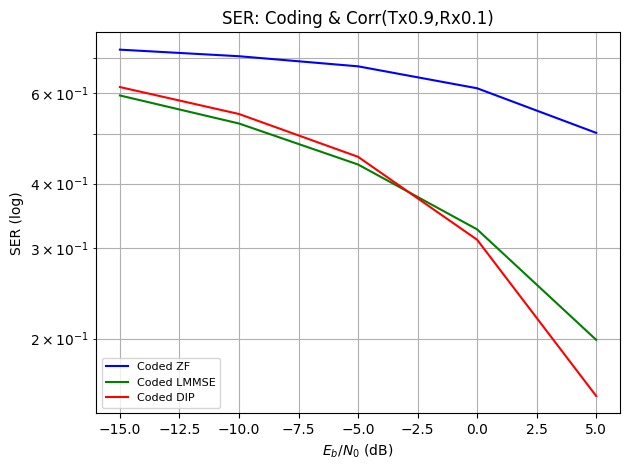

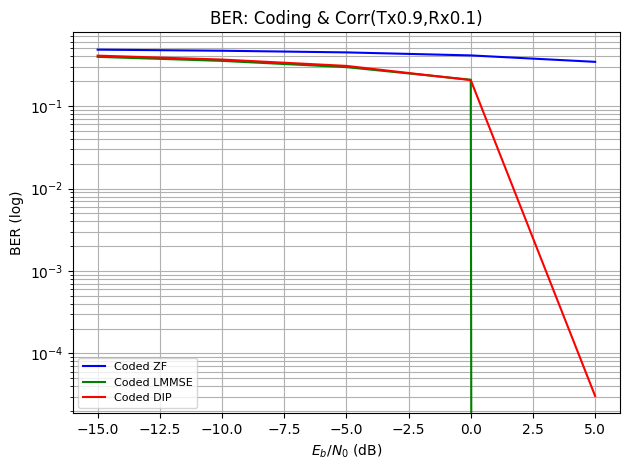

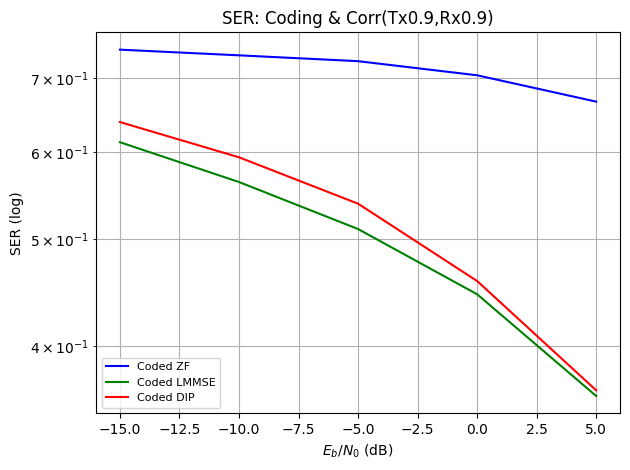

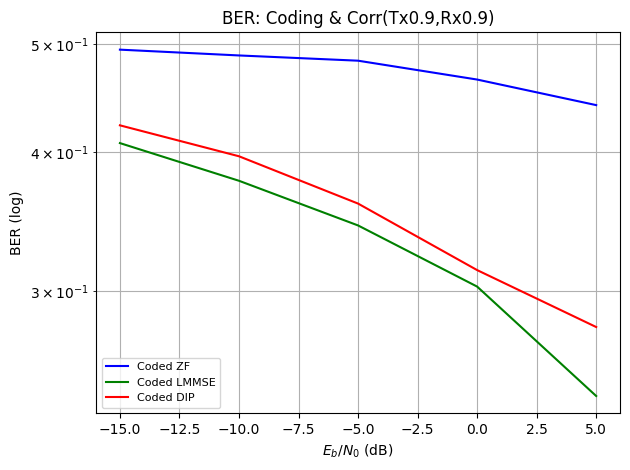

In [1]:
# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For plotting
%matplotlib inline
# also try %matplotlib widget

import matplotlib.pyplot as plt

# for performance measurements
import time

# For the implementation of the Keras models
from tensorflow import keras
from keras import Model
from YCodeYCorr import ycodeycorr

### Simulation
Block_Length = 512              # Block Length (k)
NUM_BITS_PER_SYMBOL = 2         # Mapping: 4QAM
CONSTELLATION_TYPE = "qam"      # Constellation/Modulation Type
DEMAPPING_METHOD = "app"        # Demapping Method: "app"
NUM_TX_ANT = 8                  # Transmit Antennas
NUM_RX_ANT = 8                  # Receive Antennas
CODERATE = 0.5                  # Code Rate
CORRELATION_INDEX_MIN = 0.1     # Minimum Spatial Correlation
CORRELATION_INDEX_MAX = 0.9     # Maximum Spatial Correlation
CORRELATION_INDEX_POINTS = 2    # Correlation Points between Max and Min

NUM_DATA_GROUP = 1              # Number of Data Group
BATCH_SIZE = 32                 # Number of Parallelly Processed Batches
EBN0_DB_MIN = -15.0             # Minimum Eb/N0 (dB)
EBN0_DB_MAX = 5.0               # Maximum Eb/N0 (dB)
NUM_EBN0_POINTS = 5             # EBNO Points

model_ycodeycorr = ycodeycorr(Block_Length, 
                                NUM_BITS_PER_SYMBOL,
                                CONSTELLATION_TYPE,
                                DEMAPPING_METHOD,
                                NUM_RX_ANT,
                                NUM_TX_ANT,
                                CODERATE,
                                CORRELATION_INDEX_MIN,
                                CORRELATION_INDEX_MAX,
                                CORRELATION_INDEX_POINTS)

model_ycodeycorr(NUM_DATA_GROUP, BATCH_SIZE, EBN0_DB_MIN, EBN0_DB_MAX, NUM_EBN0_POINTS)